# 2.4 Exercises

## Exerxise 1
The Cleveland Heart Disease dataset is a well-known dataset in the field of medical research and machine learning, particularly used for predicting heart disease. It contains data collected from patients with suspected heart disease and includes various clinical and demographic attributes. When downloading and implementing the dataset in your Python script, you can simply follow the steps provided on the official website or copy the relevant code directly.

1. Have a look at the first few lines of the dataset with `head()` and use `describe()` for a general overview.
2. Plot `age` against `cp` (chest pain) using `sns.boxplot`, incorporating `num` (Condition) as the `hue`. Note that patients without heart disease will have num = 0, while those with heart disease will have values ranging from 1 to 4.

     num
0      0
1      2
2      1
3      0
4      0
..   ...
298    1
299    2
300    3
301    1
302    0

[303 rows x 1 columns]
{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International applicatio

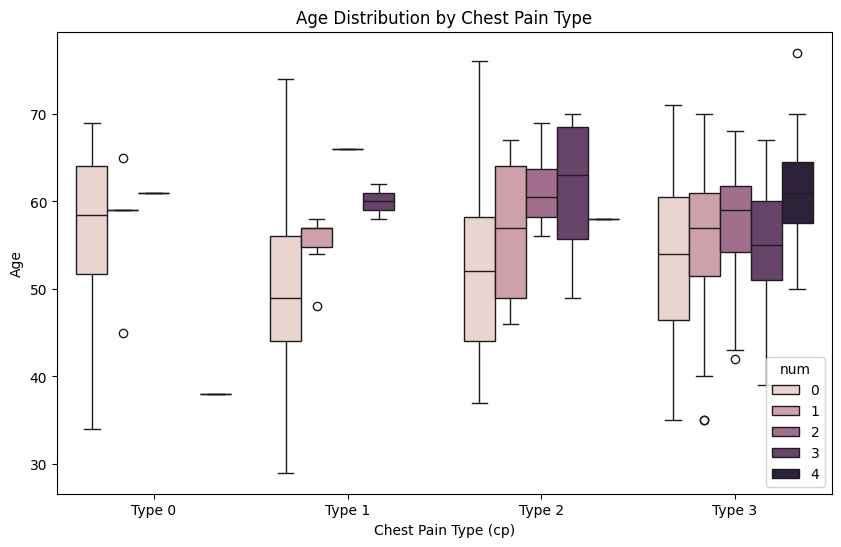

In [1]:
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
print(y)  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 

df = pd.concat([heart_disease.data.features, heart_disease.data.targets], axis=1)
## SOLUTION

#get a genreal understanding
print(df.describe())
# Display the first few rows of the dataset
print(df.head())

plt.figure(figsize=(10, 6))
sns.boxplot(x='cp', y='age', hue='num', data=df)
plt.title('Age Distribution by Chest Pain Type')
plt.xlabel('Chest Pain Type (cp)')
plt.ylabel('Age')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Type 0', 'Type 1', 'Type 2', 'Type 3'])
plt.show()

## Exercise 2
1. Create a matrix using dummy coding by defining the reference category as 1 (atypical angina). Utilize the `Treatment` from `patsy` for this process.
2. Perform linear regression using `ols()` from `Statsmodels`, with `cp` as the independent variable and `age` as the dependent variable.
3. Discuss the following points:
    - What do the coefficients tell you about the relationship between age and different types of chest pain?
    - Considering effect size and significance, do the results reflect an interesting relationship between chest pain type and age? Why or why not?


In [1]:

#load the libraries
import pandas as pd
from patsy import dmatrix
from patsy.contrasts import Treatment
import statsmodels.formula.api as smf
from ucimlrepo import fetch_ucirepo 

# Fetch the dataset 
heart_disease = fetch_ucirepo(id=45) 

# Data as pandas DataFrames 
X = heart_disease.data.features 
y = heart_disease.data.targets 

# Concatenate features and target
df = pd.concat([X, y], axis=1)

# !!SOLUTION!!



# Convert 'cp' to categorical variables
df['cp'] = df['cp'].astype('category')
  # Assuming 'num' is your dependent variable

# Get the levels of 'cp'
levels = df['cp'].cat.categories.tolist()

# Create a Treatment contrast object
contrast = Treatment(reference=1)  # Assuming you want to set the reference level to '1' (which is atypical angina)

# Create a contrast matrix using the levels of 'cp'
contrast_matrix = contrast.code_without_intercept(levels)

# Print the contrast matrix
print(contrast_matrix.matrix)

model = smf.ols('age ~ C(cp, Treatment(reference=1))', data=df).fit()
# Print the summary
print(model.summary())

[[0. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     3.364
Date:                Mon, 07 Oct 2024   Prob (F-statistic):             0.0191
Time:                        19:52:06   Log-Likelihood:                -1091.5
No. Observations:                 303   AIC:                             2191.
Df Residuals:                     299   BIC:                             2206.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

SOLUTION
The only significant difference observed is between typical and atypical angina, with patients displaying significantly younger ages and a higher prevalence of atypical angina. No other categories show significance. However, the model explains only 3.3% of the variance in age. While the significance is low in terms of explanatory power, it is important to note that in clinical contexts, the explained variance is often lower due to the complex mechanisms underlying health issues, which cannot be fully captured by such models.

## Exercise 3
1. Create a weighted effects coding matrix with age as the dependent variable and cp as the independent variable, using 1 (typical angina) as the reference category, as in the previous steps.

2. Perform linear regression using ols() from Statsmodels with the weighted effects coding matrix.

3. Compare and interpret the results against the previous dummy coding approach, specifically focusing on the impact of using a weighted reference category versus an unweighted reference. How does the weighting affect the interpretation of the relationship between cp and age?

In [ ]:
# import the libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
from ucimlrepo import fetch_ucirepo 

# Fetch the dataset 
heart_disease = fetch_ucirepo(id=45) 

# Data as pandas DataFrames 
X = heart_disease.data.features 
y = heart_disease.data.targets 

# Concatenate features and target into a single DataFrame
df = pd.concat([X, y], axis=1)

# Convert 'cp' (chest pain) to categorical variables
df['cp'] = df['cp'].astype('category')



#SOLUTION



# Calculate sample sizes for each chest pain type
cp_counts = df['cp'].value_counts()
Nt1 = cp_counts.get(1, 0)  # Typical angina
Nt2 = cp_counts.get(2, 0)  # Atypical angina
Nt3 = cp_counts.get(3, 0)  # Non-anginal pain
Nt4 = cp_counts.get(4, 0)  # Asymptomatic

# Define weights for weighted effect coding
atypical_angina_we  = np.array([1, 0, 0])  # Atypical angina
non_anginal_pain_we = np.array([0, 1, 0])  # Non-anginal pain
asymptomatic_we     = np.array([0, 0, 1])  # Asymptomatic

# Check if there's a sample size for the reference category
if Nt1 > 0:
    typical_angina_weights = np.array([-Nt2/Nt1, -Nt3/Nt1, -Nt4/Nt1])  # Weights for typical angina
else:
    raise ValueError("Sample size for reference category 'Typical angina' cannot be zero.")

# Create the contrast matrix dictionary with Typical angina as reference
contrast_matrix = {
    1: typical_angina_weights, # Typical angina (reference category with weights)
    2: atypical_angina_we,     # Atypical angina
    3: non_anginal_pain_we,    # Non-anginal pain
    4: asymptomatic_we         # Asymptomatic
}

# Print the contrast matrix
print("Contrast Matrix:")
for k, v in contrast_matrix.items():
    print(f"{k}: {v}")

# Create the design matrix (X) by mapping the chest pain types to their contrast vectors
X = np.array([contrast_matrix[cp] for cp in df['cp']])

# Add a constant (intercept) to the design matrix
X = sm.add_constant(X)

# Define the dependent variable (age)
y = df['age']

# Fit the OLS model using the contrast matrix
model = sm.OLS(y, X).fit()

# Print the summary of the results
print(model.summary())


SOLUTION:
Dummy Coding provides simple, clear comparisons against a single fixed group (like Asymptomatic), but the interpretation can be sensitive to imbalances in the reference group.
Weighted Effect Coding offers a more balanced comparison, as it adjusts the reference category to account for differences in group sizes. This results in coefficients that are more representative of the overall structure of the data.
Atypical Angina and Asymptomatic have clearer interpretations in the weighted model.
The weighted model also gives a more accurate sense of how each group (such as Atypical Angina and Asymptomatic) relates to the other chest pain categories, as it doesn’t rely on any one group being a fixed reference.